# Final Project Group 12
## <p style="color:blue;">Exploring the Impact of Health Indicators on Heart Disease
Group member：Ari Bernstein, Huai Hsuan Huang, Gokul Kumar Kesavan, Deepankar Makwana, Carissa Paul, Rui Yang




## ■ Setup
#### Create some database tables using PostgreSQL. Droping old database and creating a new one for final project. Connecting as owner student

- Using the `!dropdb` command to drop the `final_project` database if it already exists.

In [1]:
!dropdb -U postgres final_project

- Using the `!createdb` command to create a new PostgreSQL database named `final_project`.

- The `-U postgres` flag specifies the username (`postgres`) for database creation.

In [2]:
!createdb -U postgres final_project

- Using `%load_ext sql` to load the SQL extension in the Jupyter Notebook environment, enabling SQL commands to be run directly in the notebook.

- Using `%sql` to establish a connection to the `final_project` database hosted on PostgreSQL with the specified credentials (username: `postgres`, no password provided).

In [3]:
%load_ext sql

- Using `%sql` to establish a connection to the `final_project` database hosted on PostgreSQL 
- The specified credentials is (username: `postgres`, no password provided).

In [4]:
%sql postgresql://postgres@/final_project

Connecting to 'postgresql://postgres@/final_project'

## ■ Ask 1：About dataset

#### 1-1. Identify and briefly describe your dataset: Indicators of Heart Disease
The dataset is derived from the 2020 annual CDC Behavioral Risk Factor Surveillance System (BRFSS), which includes over 300,000 adult records, making it one of the largest and most comprehensive surveys on health behaviors in the United States. It focuses on key indicators that are associated with heart disease, such as Body Mass Index (BMI), smoking habits, alcohol consumption, physical activity, sleep duration and chronic health conditions like diabetes and asthma.

This dataset not only highlights individual-level health metrics but also provides valuable demographic details such as age, sex, race and general health status, enabling in-depth analysis of heart disease trends across diverse population groups. Its scale and coverage allow for regional comparisons, which can be useful for identifying geographic patterns of heart disease prevalence and guiding localized intervention strategies.

Link：https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Questionnaire for the survey：https://www.cdc.gov/brfss/questionnaires/pdf-ques/2020-BRFSS-Questionnaire-508.pdf　

#### 1-2. Identify the owner of the dataset source：Kamil Pytlak

#### 1-3. Brief description of why the dataset is important and what appeals to you about it：
The dataset is important because it offers comprehensive data that can be used to understand the relationship between various health behaviors and the risk of heart disease. It includes demographic information such as age, gender, race and region, all of which are critical in understanding how these factors contribute to heart disease risk across different populations. Moreover, this dataset provides insights into the impact of behavioral factors like physical activity, smoking, and alcohol consumption as well as chronic conditions like diabetes and asthma, on heart health.

Its significance lies in its ability to facilitate the identification of key risk factors and trends that may inform public health policies, preventive measures, and resource allocation. The inclusion of data from over 300,000 adults allows for robust statistical analysis, making it ideal for uncovering patterns that might be overlooked in smaller datasets. Additionally, the dataset's structure, with both quantitative and categorical variables, supports a wide range of analyses, from predictive modeling to hypothesis testing, making it a valuable resource for healthcare research and decision-making.

#### 1-4. Describe the analytical questions you want to answer with the data：


    ■ Impact of Demographics and General Health on Heart DiseaseExamine the role of demographic factors (e.g., sex, age, race) and general health indicators (e.g., BMI, self-reported health status) in predicting heart disease.

    ■ Effect of Health Behaviors on Heart DiseaseAnalyze how health behaviors (e.g., smoking, alcohol consumption, physical activity, and sleep duration) influence the prevalence of heart disease. 

    ■ Impact of Other Diseases on Heart DiseaseInvestigate the relationship between chronic diseases (e.g., diabetes, asthma, kidney disease, stroke, and skin cancer) and heart disease.


#### 1-5. Briefly describe any concerns with the data and changes you expect to overcome:

- Imbalanced Data: Several Boolean variables, such as HeartDisease, Smoking, AlcoholDrinking, and Stroke, show significant imbalances. For example, the HeartDisease column has 292,422 "False" entries and only 27,373 "True" entries. This imbalance could impact any analysis or dimensional modeling, as it may lead to biased results. To address this, you may consider weighting or stratifying the data when analyzing or visualizing it, though in dimensional modeling, this concern may not be as significant.

- Extreme Values: The BMI column contains extreme values, with the smallest value being 12.02 and the largest value being 94.85. These extreme values could be outliers or data entry errors. You may need to clean or cap these values to ensure they don't distort analysis. A typical approach might involve limiting the BMI values to a more reasonable range or identifying and handling outliers separately.

- Skewed Distribution of Health Data: The PhysicalHealth and MentalHealth columns have a large proportion of "0" values, indicating no reported health problems. This could lead to a skewed distribution, making it harder to analyze meaningful differences in health status. To address this, you might consider categorizing these values into broader groups (e.g., mild, moderate, severe health issues) or focusing on the non-zero values for deeper analysis.

- Ambiguous Categories: The Diabetic and GenHealth variables have categories that may be ambiguous or require further clarification. For example, Diabetic includes categories like "No, borderline diabetes" and "Yes, during pregnancy," which could be combined or recategorized to simplify analysis. Standardizing these categories will help avoid misinterpretation during the analysis phase.

- Text Data Standardization: The Sex, Race, and AgeCategory columns include text data that may not be consistent (e.g., different spellings, cases, or formatting). For instance, Sex could have variations like "male" and "Male," which need to be standardized to ensure uniformity. Standardizing the text data (e.g., making everything lowercase) will help maintain consistency and reduce errors when merging data or analyzing the dataset.

## Ask 2: Wrangling the data

Acquire the data, survey it and wrangle it to suitable format. 

- Verify the current working directory to ensure we are in the right path

#### 2-1. Upload the zip file containing the data to AWS: heart_2020_cleaned.zip

In [5]:
!pwd

/home/ubuntu


#### 2-2. Check if the file named heart_2020_cleaned.zip exists in the current directory. Then Unzip it and store it in a new directory called Data.

- Using the `!ls` command to list the contents of the `./Data/` directory. To verify the files present within the `Data` directory.

In [21]:
!ls heart_2020_cleaned.zip

heart_2020_cleaned.zip


- Using the `!unzip` command to Unzip the required file.
- Using `-o` in case there are files existing with the same name to overwrite/replace them.
- Using `-d` to create a directory called Data to store the unziped file

In [22]:
!unzip -o heart_2020_cleaned.zip -d ./Data/

Archive:  heart_2020_cleaned.zip
  inflating: ./Data/heart_2020_cleaned.csv  


- Change the current working directory to the 'Data' folder
- %cd: A Jupyter Notebook magic command used to navigate directories
- '/home/ubuntu/Data': The absolute path to the target directory

In [6]:
%cd /home/ubuntu/Data

/home/ubuntu/Data


Checking the csv file for any errors, such as malformed rows or incorrect delimiters, before further processing.

- Using the `!csvclean` command to clean the `heart_2020_cleaned.csv` file.
- The `-n` option is used to check the CSV file for any formatting issues or errors without making any changes to the file.

In [7]:
!csvclean -n heart_2020_cleaned.csv

No errors.


- Using the `!wc` command to count the number of words, lines and characters in the unzipped `heart_2020_cleaned.csv` file.
- Using `-l` to specify the `!wc` command to only count rows and give us an output

In [8]:
!wc -l heart_2020_cleaned.csv

319796 heart_2020_cleaned.csv


#### 2-3. Using CSVCut to show all column names of file heart_2020_cleaned.csv.
 
- Using the `!csvcut` command to display the column names from the CSV file.
- Using the `-n` option to list all the column names without displaying the actual data.
- The file `Data/heart_2020_cleaned.csv` is the file path to specify the input file.

In [9]:
!csvcut -n  heart_2020_cleaned.csv

  1: HeartDisease
  2: BMI
  3: Smoking
  4: AlcoholDrinking
  5: Stroke
  6: PhysicalHealth
  7: MentalHealth
  8: DiffWalking
  9: Sex
 10: AgeCategory
 11: Race
 12: Diabetic
 13: PhysicalActivity
 14: GenHealth
 15: SleepTime
 16: Asthma
 17: KidneyDisease
 18: SkinCancer


#### 2-4. Using CSVStat to find out all the details of all the attributes. Like data type, null values and other stats. 

- Using the `!head` command to display lines of the CSV file.
- Using the `-n 1000000` option to specify the number of lines to display from the beginning of the file.
- Piping the output of `head` into `csvstat` to generate summary statistics for the displayed portion of the CSV file.
- The file `Data/data.csv` is the file path to specify the input file.

In [10]:
!head -n 1000000 heart_2020_cleaned.csv | csvstat

  1. "HeartDisease"

	Type of data:          Boolean
	Contains null values:  False
	Non-null values:       319795
	Unique values:         2
	Most common values:    False (292422x)
	                       True (27373x)

  2. "BMI"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       319795
	Unique values:         3604
	Smallest value:        12.02
	Largest value:         94.85
	Sum:                   9058320.82
	Mean:                  28.325
	Median:                27.34
	StDev:                 6.356
	Most decimal places:   2
	Most common values:    26.63 (3762x)
	                       27.46 (2767x)
	                       27.44 (2723x)
	                       24.41 (2696x)
	                       27.12 (2525x)

  3. "Smoking"

	Type of data:          Boolean
	Contains null values:  False
	Non-null values:       319795
	Unique values:         2
	Most common values:    False (187887x)
	                       True (131908x)

  4. "AlcoholDrinking"

	Type 

<p style="color:red;">Based on these values, I expect we can work with the following:

#### 2-5. Create Table and Import

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `DROP TABLE IF EXISTS heartdisease;` command ensures that if the `heartdisease` table already exists, it will be deleted before creating a new one.
- The `CREATE TABLE` command creates a new table called `heartdisease` with the specified columns.
- Each column is defined with a specific data type and a `NOT NULL` constraint, meaning values for these columns must be provided.
  - For example, `HeartDisease` is a BOOLEAN type, `BMI` is a DECIMAL type with 5 digits and 2 decimal places, and `Sex` is a VARCHAR with a length of 10 characters.
- The table includes various health-related attributes, such as `HeartDisease`, `Smoking`, `PhysicalHealth`, `Sex`, and `AgeCategory`, among others.

In [11]:
%%sql
DROP TABLE IF EXISTS heartdisease;

CREATE TABLE heartdisease (
    HeartDisease BOOLEAN NOT NULL,     
    BMI DECIMAL(5,2) NOT NULL,       
    Smoking BOOLEAN NOT NULL,           
    AlcoholDrinking BOOLEAN NOT NULL,    
    Stroke BOOLEAN NOT NULL,           
    PhysicalHealth FLOAT NOT NULL,    
    MentalHealth FLOAT NOT NULL,     
    DiffWalking BOOLEAN NOT NULL,        
    Sex VARCHAR(10) NOT NULL,           
    AgeCategory VARCHAR(20) NOT NULL,    
    Race VARCHAR(30) NOT NULL,           
    Diabetic VARCHAR(50) NOT NULL,       
    PhysicalActivity BOOLEAN NOT NULL,   
    GenHealth VARCHAR(20) NOT NULL,      
    SleepTime FLOAT NOT NULL,         
    Asthma BOOLEAN NOT NULL,             
    KidneyDisease BOOLEAN NOT NULL,     
    SkinCancer BOOLEAN NOT NULL        
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

In [12]:
!pwd

/home/ubuntu/Data


In [10]:
!chmod guo+r /home/ubuntu/Data/heart_2020_cleaned.csv

In [13]:
!head heart_2020_cleaned.csv

HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No


Load the data directly using `COPY` command.  Note that this **requires** the use of an absolute path, so adjust it to the location:

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `COPY` command loads data into the `heartdisease` table from a CSV file located at `/home/ubuntu/Data/heart_2020_cleaned.csv`.
- The `CSV` option specifies that the data being loaded is in CSV format.
- The `HEADER` option indicates that the first row of the CSV file contains column headers, which should be used to map the data to the table's columns.

In [14]:
%%sql

COPY heartdisease FROM  '/home/ubuntu/Data/heart_2020_cleaned.csv'
CSV

HEADER;

Running query in 'postgresql://postgres@/final_project'

319795 rows affected.

++
||
++
++

#### 2-6. Ensure that the fact table contains the right number of records 

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT COUNT(*)` query is used to count the total number of records (rows) in the `heartdisease` table.

In [15]:
%%sql
SELECT COUNT(*) FROM heartdisease;

Running query in 'postgresql://postgres@/final_project'

1 rows affected.

count
319795


- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT *` query retrieves all columns from the `heartdisease` table.
- The `LIMIT 10` clause restricts the result to the first 10 rows of the table, allowing for a quick preview of the data without displaying the entire dataset.

In [16]:
%%sql
SELECT * FROM heartdisease
LIMIT 10

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
False,16.60,True,False,False,3.0,30.0,False,Female,55-59,White,Yes,True,Very good,5.0,True,False,True
False,20.34,False,False,True,0.0,0.0,False,Female,80 or older,White,No,True,Very good,7.0,False,False,False
False,26.58,True,False,False,20.0,30.0,False,Male,65-69,White,Yes,True,Fair,8.0,True,False,False
False,24.21,False,False,False,0.0,0.0,False,Female,75-79,White,No,False,Good,6.0,False,False,True
False,23.71,False,False,False,28.0,0.0,True,Female,40-44,White,No,True,Very good,8.0,False,False,False
True,28.87,True,False,False,6.0,0.0,True,Female,75-79,Black,No,False,Fair,12.0,False,False,False
False,21.63,False,False,False,15.0,0.0,False,Female,70-74,White,No,True,Fair,4.0,True,False,True
False,31.64,True,False,False,5.0,0.0,True,Female,80 or older,White,Yes,False,Good,9.0,True,False,False
False,26.45,False,False,False,0.0,0.0,False,Female,80 or older,White,"No, borderline diabetes",False,Fair,5.0,False,True,False
False,40.69,False,False,False,0.0,0.0,True,Male,65-69,White,No,True,Good,10.0,False,False,False


#### 2-7. Data Wrangling

##### Converting the mentalhealth, physicalhealth and sleeptime columns in the heartdisease table from FLOAT to INTEGER data type for consistency and clarity.

##### Why are we doing this?:
- These columns represent whole-number values (e.g., count of days), so INTEGER is the appropriate data type.
- Storing such data as FLOAT is unnecessary, as it increases storage space and can lead to confusion (e.g., seeing 3.0 instead of 3).
- Converting to INTEGER improves data integrity, reduces potential errors, and ensures cleaner outputs for analysis and visualization.
- The `ALTER TABLE` command is used to modify the column data type.
- The `USING` clause ensures the correct conversion of data while avoiding errors.

In [17]:
%%sql
ALTER TABLE heartdisease
ALTER COLUMN mentalhealth TYPE INTEGER USING mentalhealth::INTEGER;

ALTER TABLE heartdisease
ALTER COLUMN physicalhealth TYPE INTEGER USING physicalhealth::INTEGER;

ALTER TABLE heartdisease
ALTER COLUMN sleeptime TYPE INTEGER USING sleeptime::INTEGER;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

- Query to check the updated values of physicalhealth, mentalhealth and sleeptime
- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT *` query retrieves all columns from the `heartdisease` table.
- The `LIMIT 10` clause restricts the result to the first 10 rows of the table, allowing for a quick preview of the data without displaying the entire dataset.
- The data in mentalhealth, physicalhealth and sleeptime column have been changed to integers

In [18]:
%%sql
SELECT * FROM heartdisease
LIMIT 10

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
False,16.60,True,False,False,3,30,False,Female,55-59,White,Yes,True,Very good,5,True,False,True
False,20.34,False,False,True,0,0,False,Female,80 or older,White,No,True,Very good,7,False,False,False
False,26.58,True,False,False,20,30,False,Male,65-69,White,Yes,True,Fair,8,True,False,False
False,24.21,False,False,False,0,0,False,Female,75-79,White,No,False,Good,6,False,False,True
False,23.71,False,False,False,28,0,True,Female,40-44,White,No,True,Very good,8,False,False,False
True,28.87,True,False,False,6,0,True,Female,75-79,Black,No,False,Fair,12,False,False,False
False,21.63,False,False,False,15,0,False,Female,70-74,White,No,True,Fair,4,True,False,True
False,31.64,True,False,False,5,0,True,Female,80 or older,White,Yes,False,Good,9,True,False,False
False,26.45,False,False,False,0,0,False,Female,80 or older,White,"No, borderline diabetes",False,Fair,5,False,True,False
False,40.69,False,False,False,0,0,True,Male,65-69,White,No,True,Good,10,False,False,False


#### Categorizing BMI into Specific Weight Categories  
- **Purpose**: This query creates a new column `bmicategory` to classify BMI values into predefined weight categories for clearer analysis.

1. **ALTER TABLE**:  
   - Adds a new column `bmicategory` of type `VARCHAR(20)` to store the BMI classification.

2. **UPDATE Statement**:  
   - Uses a `CASE` statement to categorize BMI values into the following weight ranges:  
     - **`bmi < 18.50` → 'Underweight'**  
     - **`18.50 <= bmi < 25.00` → 'Healthy weight'**  
     - **`25.00 <= bmi < 30.00` → 'Overweight'**  
     - **`30.00 <= bmi < 40.00` → 'Obese'**  
     - **`bmi >= 40.00` → 'Severely Obese'**  

3. **Outcome**:  
   - Each record now has a `bmicategory` value based on the BMI range.  
   - This allows for simplified grouping and analysis of individuals based on weight classifications.


In [19]:
%%sql
ALTER TABLE heartdisease
ADD COLUMN bmicategory VARCHAR(20);

UPDATE heartdisease
SET bmicategory = 
  CASE
    WHEN bmi < 18.50 THEN 'Underweight'
    WHEN bmi >= 18.50 AND bmi < 25.00 THEN 'Healthy weight'
    WHEN bmi >= 25.00 AND bmi < 30.00 THEN 'Overweight'
    WHEN bmi >= 30.00 AND bmi < 40.00 THEN 'Obese'
    WHEN bmi >= 40.00 THEN 'Severly Obese'
  END;

Running query in 'postgresql://postgres@/final_project'

319795 rows affected.

++
||
++
++

- Query to Preview the Table After Adding bmicategory Column
- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT *` query retrieves all columns from the `heartdisease` table.
- The `LIMIT 10` clause restricts the result to the first 10 rows of the table, allowing for a quick preview of the data without displaying the entire dataset.
- A attribute bmicategory is added into the table.

In [20]:
%%sql
SELECT * FROM heartdisease
LIMIT 10

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer,bmicategory
False,25.10,False,True,False,0,4,False,Male,30-34,White,No,True,Excellent,6,False,False,False,Overweight
False,29.26,True,False,False,0,0,False,Female,70-74,White,Yes,True,Good,9,False,False,False,Overweight
False,32.69,False,False,False,0,0,False,Male,70-74,White,No,True,Fair,8,True,False,False,Obese
False,27.26,True,False,False,6,0,False,Male,55-59,White,Yes,True,Good,5,False,False,False,Overweight
False,31.93,False,False,False,30,0,True,Male,60-64,White,No,True,Good,4,False,False,False,Obese
False,33.82,False,False,False,10,0,False,Male,55-59,Black,Yes,True,Good,8,True,False,False,Obese
False,34.44,False,False,False,0,0,False,Male,70-74,White,No,True,Good,6,False,False,True,Obese
False,38.01,True,False,False,10,0,True,Male,70-74,White,No,False,Fair,7,False,False,False,Obese
False,31.17,True,False,False,0,0,False,Male,65-69,White,No,True,Very good,7,False,False,False,Obese
False,36.52,False,False,False,3,5,False,Male,60-64,White,Yes,False,Fair,8,False,False,True,Obese


- The `SELECT DISTINCT` statement is used to fetch only unique values from the `bmicategory` column.
- This query helps identify all the distinct BMI categories present in the `heartdisease` table.
- It ensures there are no duplicate values, providing a clear overview of the available BMI classifications.

In [21]:
%%sql
SELECT DISTINCT bmicategory
from heartdisease

Running query in 'postgresql://postgres@/final_project'

5 rows affected.

bmicategory
Healthy weight
Obese
Overweight
Severly Obese
Underweight


  - The `SELECT DISTINCT` statement is used to fetch unique values from the `agecategory` column.  
- This query helps identify all the distinct age group categories present in the `heartdisease` table.  
- It ensures there are no duplicate values, providing a concise list of all age groups available in the dataset.  

In [22]:
%%sql
SELECT DISTINCT agecategory
From heartdisease

Running query in 'postgresql://postgres@/final_project'

13 rows affected.

agecategory
18-24
25-29
30-34
35-39
40-44
45-49
50-54
55-59
60-64
65-69


#### Categorizing Age Groups into Custom Categories  
- **Purpose**: This query adds a new column `age_category` to the `heartdisease` table, which classifies age groups into broader, custom categories for better analysis.

1. **ALTER TABLE**:  
   - Adds a new column `age_category` of type `VARCHAR(20)` to store the age group labels.

2. **UPDATE Statement**:  
   - Uses a `CASE` statement to categorize existing `agecategory` values into broader categories:  
     - `18-24`, `25-29`, `30-34` → **'Young Adult'**  
     - `35-39`, `40-44`, `45-49` → **'Prime Adult'**  
     - `50-54`, `55-59`, `60-64` → **'Mature Adult'**  
     - `65-69`, `70-74`, `75-79`, `80 or older` → **'Senior Citizen'**  

3. **Outcome**:  
   - Each record in the table now has a corresponding `age_category` value based on the `agecategory` column.  
   - This makes it easier to group and analyze data at a higher level.  

In [23]:
%%sql
ALTER TABLE heartdisease
ADD COLUMN age_category VARCHAR(20);

UPDATE heartdisease
SET age_category =
  CASE
    WHEN agecategory IN ('18-24', '25-29', '30-34') THEN 'Young Adult'
    WHEN agecategory IN ('35-39', '40-44', '45-49') THEN 'Prime Adult'
    WHEN agecategory IN ('50-54', '55-59', '60-64') THEN 'Mature Adult'
    WHEN agecategory IN ('65-69', '70-74', '75-79', '80 or older') THEN 'Senior Citizen'
  END;

Running query in 'postgresql://postgres@/final_project'

319795 rows affected.

++
||
++
++

- Query to Retrieve Unique Age Categories and Their Mapped Values  
- The `SELECT DISTINCT` statement is used to fetch unique combinations of values from the `agecategory` and `age_category` columns.  
- This query helps verify that the `agecategory` column has been correctly mapped to its corresponding `age_category` values.  
- The `ORDER BY` clause sorts the results based on the `agecategory` column for better readability.  
- It ensures that there are no duplicate mappings and provides a clear overview of the age groupings.

In [24]:
%%sql
SELECT DISTINCT agecategory, age_category
FROM heartdisease
ORDER BY agecategory;

Running query in 'postgresql://postgres@/final_project'

13 rows affected.

agecategory,age_category
18-24,Young Adult
25-29,Young Adult
30-34,Young Adult
35-39,Prime Adult
40-44,Prime Adult
45-49,Prime Adult
50-54,Mature Adult
55-59,Mature Adult
60-64,Mature Adult
65-69,Senior Citizen


- Query to Preview the Table After Adding age_category Column  
- The `SELECT *` statement retrieves all columns from the `heartdisease` table.  
- The `LIMIT 10` clause restricts the result to the first 10 rows of the table, allowing a quick preview.  
- This query is used to confirm that the new `age_category` column has been successfully added and populated with the correct values.  
- By displaying a subset of the table, we can validate that the changes are reflected as expected without querying the entire dataset.

In [25]:
%%sql
SELECT * FROM heartdisease
LIMIT 10

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer,bmicategory,age_category
False,36.52,False,False,False,3,5,False,Male,60-64,White,Yes,False,Fair,8,False,False,True,Obese,Mature Adult
False,29.18,True,False,False,0,15,False,Female,65-69,White,No,True,Good,7,False,False,False,Overweight,Senior Citizen
True,34.67,True,False,False,0,15,False,Male,40-44,White,Yes,True,Good,7,False,False,False,Obese,Prime Adult
False,32.28,False,False,False,0,2,False,Male,18-24,Asian,No,True,Good,8,False,False,False,Obese,Young Adult
False,31.93,False,False,False,0,0,False,Female,45-49,Hispanic,No,True,Fair,7,False,False,False,Obese,Prime Adult
False,20.67,False,False,False,0,15,False,Female,35-39,Other,No,True,Excellent,8,True,False,False,Healthy weight,Prime Adult
False,31.65,True,False,False,6,0,False,Male,35-39,White,No,True,Good,8,False,False,False,Obese,Prime Adult
False,30.47,False,False,False,0,0,False,Female,55-59,Hispanic,No,True,Good,6,False,False,False,Obese,Mature Adult
True,35.58,True,False,True,30,0,True,Male,55-59,White,Yes,False,Poor,8,False,False,False,Obese,Mature Adult
False,20.98,False,False,False,0,0,False,Female,80 or older,White,No,False,Good,8,False,False,False,Healthy weight,Senior Citizen


#### 2-8. Model data using dimensional modeling

- Importing the `Image` class from the `IPython.display` module to display images within the Jupyter Notebook.
- Using `Image("disease.jpg", width=800)` to display the image file `disease.jpg` with a specified width of 800 pixels.

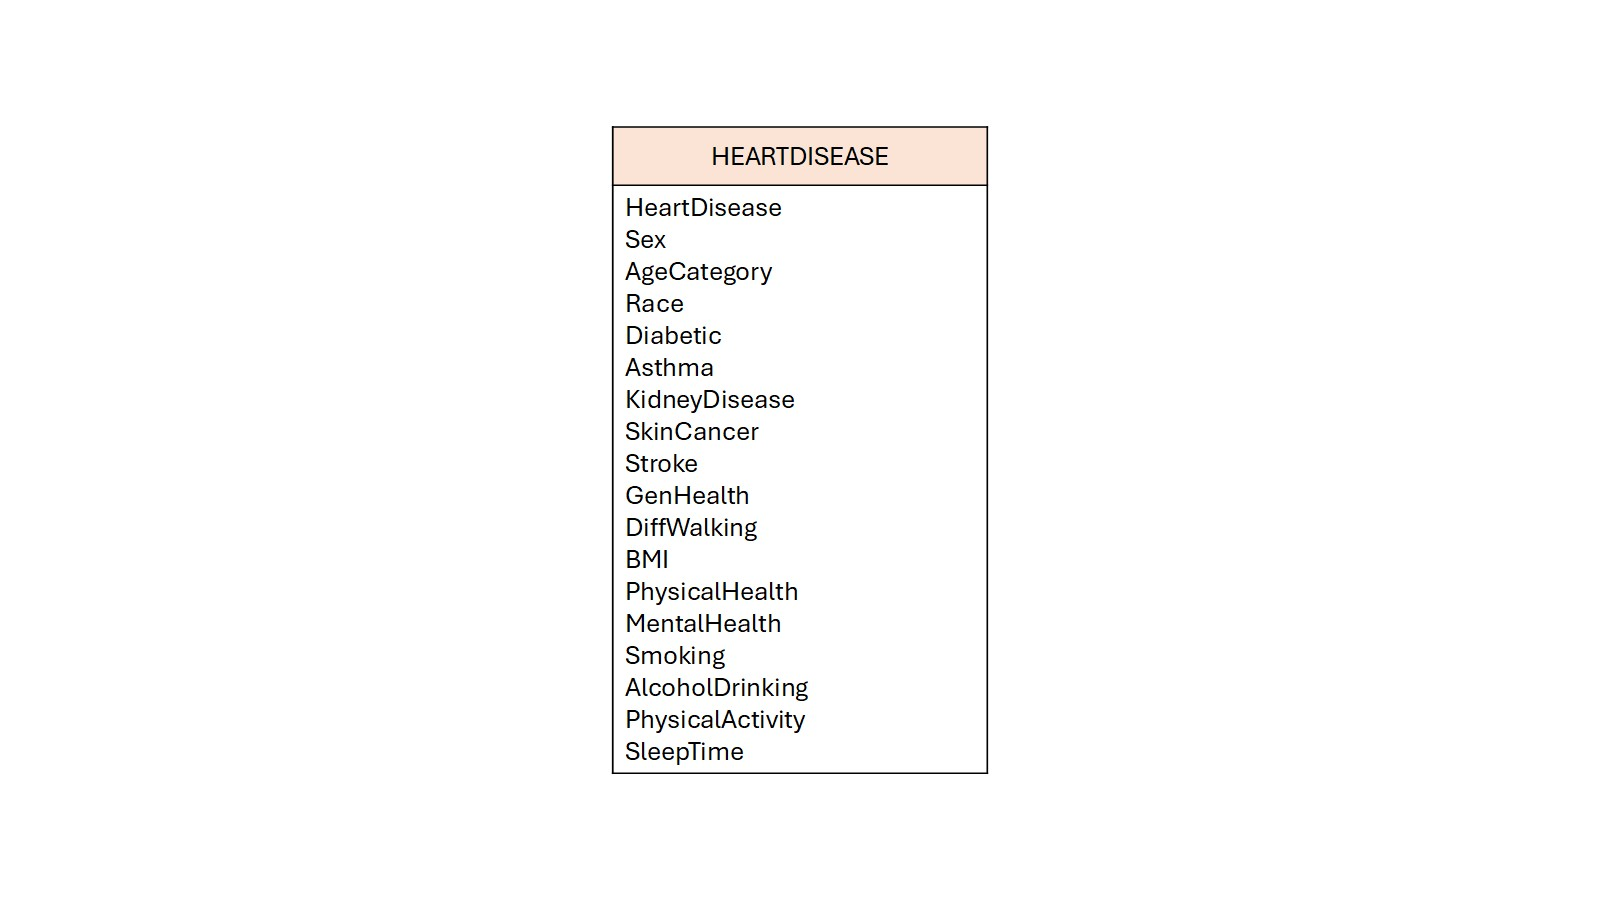

In [1]:
from IPython.display import Image
Image("disease.jpg", width=800) 

#### 2-8-1. Dimension Table

- Importing the `Image` class from the `IPython.display` module to display images within the Jupyter Notebook.
- Using `Image("dimension.jpg", width=800)` to display the image file `dimension.jpg` with a specified width of 800 pixels.

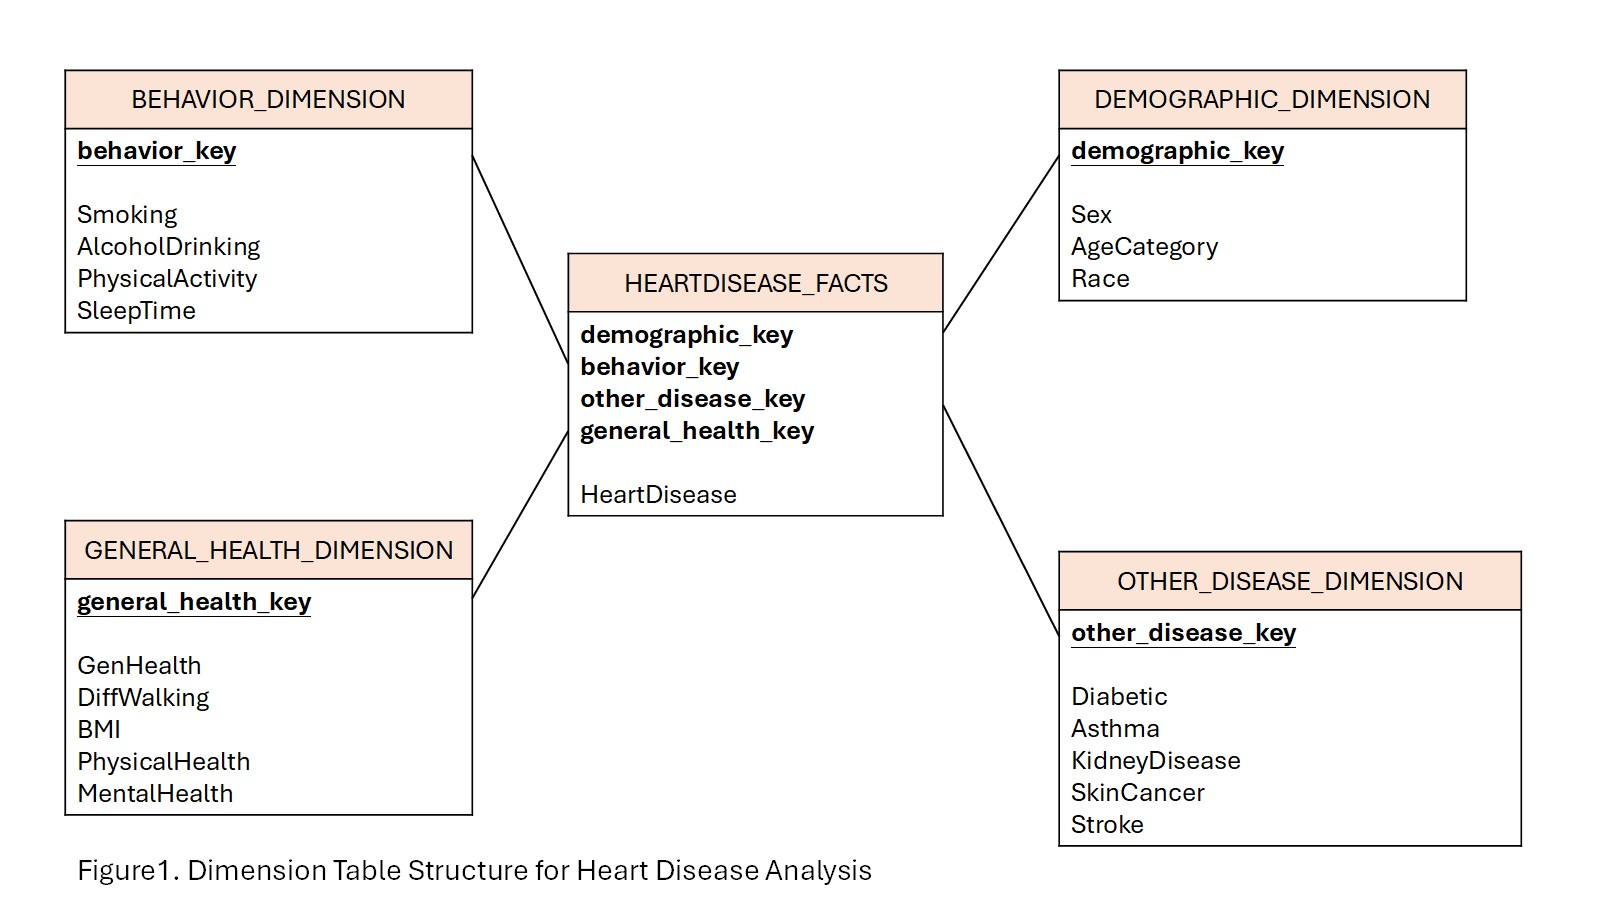

In [2]:
from IPython.display import Image
Image("dimension.jpg", width=800)  

#### 2-8-2. Create all dimension table

#### A. Demographic dimension

Survey main table 

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT DISTINCT` query retrieves unique combinations of the `Sex`, `AgeCategory`, `Age_Category` and `Race` columns from the `heartdisease` table.
- The `ORDER BY Sex` clause sorts the results by the `Sex` column in ascending order.

In [26]:
%%sql
SELECT DISTINCT sex, agecategory, age_category, Race
FROM heartdisease
ORDER BY sex
LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

sex,agecategory,age_category,race
Female,65-69,Senior Citizen,American Indian/Alaskan Native
Female,75-79,Senior Citizen,Hispanic
Female,40-44,Prime Adult,American Indian/Alaskan Native
Female,80 or older,Senior Citizen,Other
Female,60-64,Mature Adult,American Indian/Alaskan Native
Female,30-34,Young Adult,White
Female,45-49,Prime Adult,Black
Female,30-34,Young Adult,Other
Female,18-24,Young Adult,Other
Female,30-34,Young Adult,Black


Create table

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `DROP TABLE IF EXISTS demographic;` command ensures that if the `demographic` table already exists, it will be deleted before creating a new one.
- The `CREATE TABLE` command creates a new table called `demographic` with the specified columns.
- Each column is defined with a specific data type and a `NOT NULL` constraint, meaning values for these columns must be provided.
- The table includes various Demographic attributes, such as `Sex`, `AgeCategory`, `Age_Category` and `Race`.

In [27]:
%%sql
DROP TABLE IF EXISTS demographic;

CREATE TABLE demographic (
    demographic_key SERIAL PRIMARY KEY,
    Sex VARCHAR(10) NOT NULL,
    Age VARCHAR(20) NOT NULL,
    Age_Category VARCHAR(20) NOT NULL,
    Race VARCHAR(30) NOT NULL
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

Insert value from fact table 

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `INSERT INTO demographic` statement inserts distinct values into the `demographic` table for the columns `Sex`, `AgeCategory`, `Age_Category` and `Race`.
- The `SELECT DISTINCT` query retrieves unique combinations of `Sex`, `AgeCategory`, and `Race` from the `heartdisease` table.
- This operation helps populate the `demographic` table with unique demographic data from the `heartdisease` table without duplicates.

In [28]:
%%sql
INSERT INTO demographic (sex, age, age_category, race)
SELECT DISTINCT sex AS Sex, 
       agecategory AS Age,
       age_category AS Age_Category,
       race AS Race
FROM heartdisease

Running query in 'postgresql://postgres@/final_project'

156 rows affected.

++
||
++
++

Check if data was inserted as intended.

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT *` query retrieves all columns from the `demographic` table.
- The `LIMIT 10` clause restricts the result to the first 10 rows, providing a quick preview of the data stored in the `demographic` table.

In [29]:
%%sql
SELECT * FROM demographic LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

demographic_key,sex,age,age_category,race
1,Male,45-49,Prime Adult,Black
2,Female,30-34,Young Adult,Other
3,Female,75-79,Senior Citizen,Hispanic
4,Female,45-49,Prime Adult,Black
5,Female,80 or older,Senior Citizen,Other
6,Female,60-64,Mature Adult,American Indian/Alaskan Native
7,Female,30-34,Young Adult,White
8,Male,30-34,Young Adult,American Indian/Alaskan Native
9,Male,35-39,Prime Adult,White
10,Female,18-24,Young Adult,Other


Add demographic_key to fact table

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `ALTER TABLE heartdisease` statement modifies the `heartdisease` table by adding a new column called `demographic_key` of type `INTEGER`.
- The `ADD CONSTRAINT fk_demographic_key` clause defines a foreign key constraint on the `demographic_key` column.
- The `FOREIGN KEY (demographic_key) REFERENCES demographic (demographic_key)` part establishes a relationship between the `heartdisease` and `demographic` tables by referencing the `demographic_key` column in the `demographic` table. This enforces referential integrity between the two tables.

In [30]:
%%sql
ALTER TABLE heartdisease
ADD COLUMN demographic_key INTEGER,
ADD CONSTRAINT fk_demographic_key
    FOREIGN KEY (demographic_key)
    REFERENCES demographic (demographic_key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

Check if the demographic_key column has been added to the heartdisease table as intended.

In [31]:
%%sql 
SELECT * FROM heartdisease LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer,bmicategory,age_category,demographic_key
False,20.98,False,False,False,0,0,False,Female,80 or older,White,No,False,Good,8,False,False,False,Healthy weight,Senior Citizen,None
False,29.50,True,False,False,0,10,False,Male,45-49,Asian,No,True,Good,8,False,False,False,Overweight,Prime Adult,None
False,23.49,False,False,False,0,0,False,Female,55-59,White,No,True,Excellent,7,False,False,False,Healthy weight,Mature Adult,None
False,32.61,False,False,True,30,30,True,Female,80 or older,White,No,True,Poor,8,True,False,True,Obese,Senior Citizen,None
False,37.59,True,False,False,0,0,False,Male,70-74,White,No,True,Good,5,False,False,True,Obese,Senior Citizen,None
False,35.87,False,False,False,0,0,False,Male,65-69,White,No,True,Good,7,False,False,False,Obese,Senior Citizen,None
False,32.55,True,False,False,0,0,True,Male,70-74,White,Yes,False,Fair,6,False,False,False,Obese,Senior Citizen,None
False,32.49,True,False,False,1,30,False,Male,18-24,White,No,False,Good,8,False,False,False,Obese,Young Adult,None
False,38.00,True,False,False,0,0,False,Male,30-34,White,No,True,Good,5,True,False,False,Obese,Young Adult,None
False,30.99,False,False,False,0,0,False,Male,55-59,White,No,False,Fair,6,False,False,True,Obese,Mature Adult,None


Link demographic_key by the variable "Sex", "AgeCategory","Age_Category" "Race"

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `UPDATE heartdisease` statement updates the `heartdisease` table by setting the `demographic_key` column.
- The `SET demographic_key = demographic.demographic_key` clause assigns the value of the `demographic_key` from the `demographic` table to the `heartdisease` table.
- The `FROM demographic` clause specifies the source table for the update.
- The `WHERE` clause ensures that the update occurs only when there is a match between the `Sex`, `AgeCategory`, `Age_Category` and `Race` columns in both the `heartdisease` and `demographic` tables, establishing the correct relationship between the tables.

In [32]:
%%sql
UPDATE heartdisease
SET demographic_key = demographic.demographic_key
FROM demographic
WHERE heartdisease.Sex = demographic.Sex
    AND heartdisease.AgeCategory = demographic.Age
    AND heartdisease.age_category = demographic.Age_Category
    AND heartdisease.Race = demographic.Race
    ; 

Running query in 'postgresql://postgres@/final_project'

319795 rows affected.

++
||
++
++

Check if the link between both table is working as intended.

In [33]:
%%sql 
SELECT * FROM heartdisease LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer,bmicategory,age_category,demographic_key
False,35.44,False,False,False,0,0,False,Female,65-69,Hispanic,Yes,False,Good,8,False,False,False,Obese,Senior Citizen,144
False,24.89,False,False,False,0,7,False,Female,18-24,Hispanic,No,True,Excellent,8,False,False,False,Healthy weight,Young Adult,143
False,34.08,True,False,False,0,0,False,Male,40-44,White,No,False,Very good,6,False,False,False,Obese,Prime Adult,140
False,26.63,False,True,False,0,5,False,Female,18-24,White,No,True,Very good,6,False,False,False,Overweight,Young Adult,100
True,29.41,True,False,False,30,30,True,Male,70-74,American Indian/Alaskan Native,Yes,False,Poor,10,False,True,True,Overweight,Senior Citizen,88
False,29.13,False,False,False,15,10,False,Female,60-64,White,No,True,Very good,7,False,False,True,Overweight,Mature Adult,150
False,32.03,False,False,False,0,30,False,Female,35-39,Hispanic,No,False,Good,7,False,False,False,Obese,Prime Adult,82
False,40.44,True,False,False,0,0,False,Male,35-39,White,No,True,Good,7,False,False,False,Severly Obese,Prime Adult,9
False,26.63,True,True,False,3,5,False,Female,55-59,Hispanic,No,True,Very good,6,False,False,False,Overweight,Mature Adult,146
False,22.69,True,False,False,0,0,False,Male,35-39,White,No,True,Excellent,7,False,False,False,Healthy weight,Prime Adult,9


Drop the transfered columns from heartdisease table.

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `ALTER TABLE heartdisease` statement modifies the `heartdisease` table by removing three columns: `Sex`, `AgeCategory`, `Age_Category`and `Race`.
- The `DROP COLUMN` clause is used to delete these columns, because their data has already been integrated into the `demographic_key` column, and the columns are no longer necessary for analysis.

In [34]:
%%sql
ALTER TABLE heartdisease 
DROP COLUMN Sex,
DROP COLUMN AgeCategory,
DROP COLUMN Race,
DROP COLUMN age_category
    ;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

#### B. OtherDisease dimension
The same process as creating demographic table.

Create table

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `DROP TABLE IF EXISTS otherdisease;` command ensures that if the `otherdisease` table already exists, it will be deleted before creating a new one.
- The `CREATE TABLE` command creates a new table called `otherdisease` with the specified columns.
- Each column is defined with a specific data type and a `NOT NULL` constraint, meaning values for these columns must be provided.
- The table includes various Demographic attributes, such as `Diabetic`, `Asthma`, `Age_Category`, `KidneyDisease`, `Stroke`and `SkinCancer`.

In [35]:
%%sql
DROP TABLE IF EXISTS otherdisease;

CREATE TABLE otherdisease (
    otherdisease_key SERIAL PRIMARY KEY,
    Diabetic VARCHAR(50)  ,
    Asthma BOOLEAN,
    KidneyDisease BOOLEAN,
    Stroke BOOLEAN,
    SkinCancer BOOLEAN
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

Insert value from fact table 

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `INSERT INTO otherdisease` statement inserts distinct values into the `otherdisease` table for each of the specific columns from the `heartdisease` table.
- This operation helps populate the `otherdisease` table with unique otherdisease data from the `heartdisease` table without duplicates.

In [36]:
%%sql
INSERT INTO otherdisease (Diabetic, Asthma, KidneyDisease, SkinCancer, Stroke)
SELECT Distinct
       Diabetic AS Diabetic, 
       Asthma AS Asthma,
       KidneyDisease AS KidneyDisease,
       Stroke AS Stroke,
       SkinCancer AS SkinCancer
FROM heartdisease

Running query in 'postgresql://postgres@/final_project'

64 rows affected.

++
||
++
++

Check if data was inserted as intended.

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT *` query retrieves all columns from the `otherdisease` table.
- The `LIMIT 10` clause restricts the result to the first 10 rows, providing a quick preview of the data stored in the `otherdisease` table.

In [37]:
%%sql
SELECT * FROM otherdisease LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

otherdisease_key,diabetic,asthma,kidneydisease,stroke,skincancer
1,No,False,False,False,True
2,"No, borderline diabetes",True,False,True,True
3,Yes (during pregnancy),True,True,False,False
4,Yes (during pregnancy),True,False,True,False
5,Yes,False,True,False,True
6,Yes,False,True,False,False
7,Yes,True,False,False,False
8,"No, borderline diabetes",True,False,True,False
9,Yes (during pregnancy),False,False,False,False
10,Yes,True,True,True,False


### Add otherdisease_key to fact table

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `ALTER TABLE heartdisease` statement modifies the `heartdisease` table by adding a new column called `otherdisease_key` of type `INTEGER`.  
- The `ADD CONSTRAINT fk_otherdisease_key` clause defines a foreign key constraint on the `otherdisease_key` column.  
- The `FOREIGN KEY (otherdisease_key) REFERENCES otherdisease (otherdisease_key)` part establishes a relationship between the `heartdisease` and `otherdisease` tables by referencing the `otherdisease_key` column in the `otherdisease` table. This enforces referential integrity between the two tables.

In [38]:
%%sql
ALTER TABLE heartdisease
ADD COLUMN otherdisease_key INTEGER,
ADD CONSTRAINT fk_otherdisease_key
    FOREIGN KEY (otherdisease_key)
    REFERENCES otherdisease (otherdisease_key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

Link otherdisease_key by the variables "Diabetic", "Asthma", "KidneyDisease", "SkinCancer", and "Stroke"

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `UPDATE heartdisease` statement updates the `heartdisease` table by setting the `otherdisease_key` column.  
- The `SET otherdisease_key = otherdisease.otherdisease_key` clause assigns the value of the `otherdisease_key` from the `otherdisease` table to the `heartdisease` table.  
- The `FROM otherdisease` clause specifies the source table for the update.  
- The `WHERE` clause ensures that the update occurs only when there is a match between the `Diabetic`, `Asthma`, `KidneyDisease`, `SkinCancer`, and `Stroke` columns in both the `heartdisease` and `otherdisease` tables, establishing the correct relationship between the tables.

In [39]:
%%sql
UPDATE heartdisease
SET otherdisease_key = otherdisease.otherdisease_key
FROM otherdisease
WHERE heartdisease.Diabetic = otherdisease.Diabetic
   AND heartdisease.Asthma = otherdisease.Asthma
    AND heartdisease.KidneyDisease = otherdisease.KidneyDisease
    AND heartdisease.SkinCancer = otherdisease.SkinCancer
    AND heartdisease.Stroke = otherdisease.Stroke
    ;

Running query in 'postgresql://postgres@/final_project'

319795 rows affected.

++
||
++
++

Check if the link between both table is working as intended.

In [40]:
%%sql
SELECT * FROM heartdisease LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer,bmicategory,demographic_key,otherdisease_key
False,24.89,False,False,False,0,7,False,No,True,Excellent,8,False,False,False,Healthy weight,143,26
False,42.97,False,True,False,2,25,False,No,True,Good,8,False,False,False,Severly Obese,100,26
False,20.80,False,False,False,0,3,False,No,True,Very good,6,False,False,False,Healthy weight,24,26
False,26.61,False,True,False,0,15,False,No,True,Very good,5,False,False,False,Overweight,153,26
True,39.48,False,False,False,0,0,False,No,True,Good,8,False,False,False,Obese,150,26
False,24.96,False,False,False,0,0,False,No,True,Very good,7,False,False,False,Healthy weight,75,26
False,27.80,False,False,False,0,0,False,No,True,Excellent,7,False,False,False,Overweight,34,26
False,32.95,False,False,False,2,0,True,No,False,Fair,7,False,False,False,Obese,55,26
False,29.29,False,False,False,3,15,False,No,True,Fair,7,False,False,False,Overweight,147,26
False,27.89,True,True,False,0,0,False,No,False,Excellent,5,False,False,False,Overweight,17,26


Drop the transferred columns from the `heartdisease` table.

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `ALTER TABLE heartdisease` statement modifies the `heartdisease` table by removing five columns: `Diabetic`, `Asthma`, `KidneyDisease`, `SkinCancer`, and `Stroke`.  
- The `DROP COLUMN` clause is used to delete these columns because their data has already been integrated into the `otherdisease_key` column, and the columns are no longer necessary for analysis.  

In [41]:
%%sql
ALTER TABLE heartdisease 
DROP COLUMN Diabetic,
DROP COLUMN Asthma,
DROP COLUMN KidneyDisease,
DROP COLUMN SkinCancer,
DROP COLUMN Stroke
    ;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

#### C. Behavior dimension
The same process as creating the other tables.

Create table

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `DROP TABLE IF EXISTS behavior;` command ensures that if the `behavior` table already exists, it will be deleted before creating a new one.
- The `CREATE TABLE` command creates a new table called `behavior` with the specified columns.
- Each column is defined with a specific data type and a `NOT NULL` constraint, meaning values for these columns must be provided.
- The table includes various Demographic attributes, such as `Smoking`, `AlcoholDrinking`, `SleepTime`, `PhysicalActivity`.

In [42]:
%%sql
DROP TABLE IF EXISTS behavior;

CREATE TABLE behavior (
    behavior_key SERIAL PRIMARY KEY,
    Smoking BOOLEAN,
    AlcoholDrinking BOOLEAN,
    SleepTime FLOAT,
    PhysicalActivity BOOLEAN 
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

Insert value from fact table 

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `INSERT INTO behavior` statement inserts distinct values into the `behavior` table for each of the specific columns from the `heartdisease` table.
- This operation helps populate the `behavior` table with unique behavior data from the `heartdisease` table without duplicates.

In [43]:
%%sql
INSERT INTO behavior (Smoking, AlcoholDrinking, SleepTime, PhysicalActivity)
SELECT DISTINCT
       Smoking AS Smoking, 
       AlcoholDrinking AS AlcoholDrinking,
       SleepTime AS SleepTime,
       PhysicalActivity AS PhysicalActivity
FROM heartdisease

Running query in 'postgresql://postgres@/final_project'

165 rows affected.

++
||
++
++

Check if data was inserted as intended.

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT *` query retrieves all columns from the `behavior` table.
- The `LIMIT 10` clause restricts the result to the first 10 rows, providing a quick preview of the data stored in the `behavior` table.

In [44]:
%%sql
SELECT * FROM behavior LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

behavior_key,smoking,alcoholdrinking,sleeptime,physicalactivity
1,False,True,6.0,True
2,True,False,9.0,False
3,True,True,10.0,False
4,False,False,1.0,True
5,True,False,17.0,False
6,True,False,1.0,True
7,False,False,17.0,True
8,False,False,21.0,True
9,False,True,12.0,False
10,True,False,17.0,True


 Add behavior_key to fact table

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `ALTER TABLE heartdisease` statement modifies the `heartdisease` table by adding a new column called `behavior_key` of type `INTEGER`.  
- The `ADD CONSTRAINT fk_behavior_key` clause defines a foreign key constraint on the `behavior_key` column.  
- The `FOREIGN KEY (behavior_key) REFERENCES behavior (behavior_key)` part establishes a relationship between the `heartdisease` and `behavior` tables by referencing the `behavior_key` column in the `behavior` table. This enforces referential integrity between the two tables.


In [45]:
%%sql
ALTER TABLE heartdisease
ADD COLUMN behavior_key INTEGER,
ADD CONSTRAINT fk_behavior_key
    FOREIGN KEY (behavior_key)
    REFERENCES behavior (behavior_key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

Link behavior_key by the variables "Smoking", "AlcoholDrinking", "SleepTime", and "PhysicalActivity"

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `UPDATE heartdisease` statement updates the `heartdisease` table by setting the `behavior_key` column.  
- The `SET behavior_key = behavior.behavior_key` clause assigns the value of the `behavior_key` from the `behavior` table to the `heartdisease` table.  
- The `FROM behavior` clause specifies the source table for the update.  
- The `WHERE` clause ensures that the update occurs only when there is a match between the `Smoking`, `AlcoholDrinking`, `SleepTime`, and `PhysicalActivity` columns in both the `heartdisease` and `behavior` tables, establishing the correct relationship between the tables.


In [46]:
%%sql
UPDATE heartdisease
SET behavior_key = behavior.behavior_key
FROM behavior
WHERE heartdisease.Smoking = behavior.Smoking
   AND  heartdisease.AlcoholDrinking = behavior.AlcoholDrinking
   AND  heartdisease.SleepTime = behavior.SleepTime
   AND heartdisease.PhysicalActivity = behavior.PhysicalActivity
    ;

Running query in 'postgresql://postgres@/final_project'

319795 rows affected.

++
||
++
++

Check if the link between both table is working as intended.

In [47]:
%%sql
SELECT * FROM heartdisease LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,smoking,alcoholdrinking,physicalhealth,mentalhealth,diffwalking,physicalactivity,genhealth,sleeptime,bmicategory,demographic_key,otherdisease_key,behavior_key
False,32.95,False,False,2,0,True,False,Fair,7,Obese,55,26,158
False,29.29,False,False,3,15,False,True,Fair,7,Overweight,147,26,60
False,27.89,True,True,0,0,False,False,Excellent,5,Overweight,17,26,100
False,31.75,False,False,0,0,False,True,Very good,6,Obese,97,26,106
False,28.70,False,False,0,0,False,True,Excellent,8,Overweight,130,26,28
False,19.48,True,False,30,20,True,False,Poor,6,Healthy weight,150,26,53
False,34.44,True,False,0,5,False,True,Good,6,Obese,116,26,80
False,31.66,False,False,0,0,False,True,Excellent,7,Obese,80,26,60
False,33.29,False,False,0,0,False,True,Good,7,Obese,109,26,60
False,28.48,True,False,3,0,False,True,Very good,7,Overweight,116,26,15


Drop the transferred columns from the `heartdisease` table.

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `ALTER TABLE heartdisease` statement modifies the `heartdisease` table by removing four columns: `Smoking`, `AlcoholDrinking`, `SleepTime`, and `PhysicalActivity`.  
- The `DROP COLUMN` clause is used to delete these columns because their data has already been integrated into the `behavior_key` column, and the columns are no longer necessary for analysis.  

In [48]:
%%sql
ALTER TABLE heartdisease 
DROP COLUMN Smoking,
DROP COLUMN AlcoholDrinking,  
DROP COLUMN SleepTime,   
DROP COLUMN PhysicalActivity   
    ;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

#### D. General health dimension
The same process as creating the other tables.

reate table

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `DROP TABLE IF EXISTS generalhealth;` command ensures that if the `generalhealth` table already exists, it will be deleted before creating a new one.
- The `CREATE TABLE` command creates a new table called `generalhealth` with the specified columns.
- Each column is defined with a specific data type and a `NOT NULL` constraint, meaning values for these columns must be provided.
- The table includes various Demographic attributes, such as `BMI`, `BMI_Category`, `PhysicalHealth`, `MentalHealth`, `DiffWalking`, `GenHealth`

In [49]:
%%sql
DROP TABLE IF EXISTS generalhealth;

CREATE TABLE generalhealth (
    generalhealth_key SERIAL PRIMARY KEY,
    BMI DECIMAL(5,2),
    BMI_Category VARCHAR(20),
    PhysicalHealth FLOAT,
    MentalHealth FLOAT,
    DiffWalking BOOLEAN,
    GenHealth VARCHAR(20)
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

Insert value from fact table 

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `INSERT INTO generalhealth` statement inserts distinct values into the `generalhealth` table for each of the specific columns from the `heartdisease` table.
- This operation helps populate the `generalhealth` table with unique generalhealth data from the `heartdisease` table without duplicates.

In [50]:
%%sql
INSERT INTO generalhealth (BMI, BMI_Category, PhysicalHealth, MentalHealth, DiffWalking, GenHealth)
SELECT DISTINCT
       BMI AS BMI,
       bmicategory AS BMI_Category,
       PhysicalHealth AS PhysicalHealth, 
       MentalHealth AS MentalHealth,
       DiffWalking AS DiffWalking,
       GenHealth AS GenHealth
    
FROM heartdisease

Running query in 'postgresql://postgres@/final_project'

109458 rows affected.

++
||
++
++

Check if data was inserted as intended.

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT *` query retrieves all columns from the `generalhealth` table.
- The `LIMIT 10` clause restricts the result to the first 10 rows, providing a quick preview of the data stored in the `generalhealth` table.

In [51]:
%%sql
SELECT * FROM generalhealth LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

generalhealth_key,bmi,bmi_category,physicalhealth,mentalhealth,diffwalking,genhealth
1,22.47,Healthy weight,1.0,1.0,False,Very good
2,20.48,Healthy weight,30.0,30.0,False,Fair
3,39.94,Obese,0.0,27.0,False,Good
4,21.58,Healthy weight,0.0,14.0,False,Excellent
5,24.97,Healthy weight,5.0,0.0,False,Good
6,23.99,Healthy weight,0.0,1.0,False,Excellent
7,34.67,Obese,3.0,20.0,True,Fair
8,28.89,Overweight,4.0,0.0,False,Good
9,34.02,Obese,0.0,14.0,True,Good
10,36.52,Obese,0.0,7.0,False,Good


 Add generalhealth_key to fact table

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `ALTER TABLE heartdisease` statement modifies the `heartdisease` table by adding a new column called `generalhealth_key` of type `INTEGER`.  
- The `ADD CONSTRAINT fk_generalhealth_key` clause defines a foreign key constraint on the `generalhealth_key` column.  
- The `FOREIGN KEY (generalhealth_key) REFERENCES generalhealth (generalhealth_key)` part establishes a relationship between the `heartdisease` and `generalhealth` tables by referencing the `generalhealth_key` column in the `generalhealth` table. This enforces referential integrity between the two tables.


In [52]:
%%sql
ALTER TABLE heartdisease
ADD COLUMN generalhealth_key INTEGER,
ADD CONSTRAINT fk_generalhealth_key
    FOREIGN KEY (generalhealth_key)
    REFERENCES generalhealth (generalhealth_key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

Link generalhealth_key by the variables "PhysicalHealth", "MentalHealth", "DiffWalking", "GenHealth", "BMI", and "BMI_Category"

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `UPDATE heartdisease` statement updates the `heartdisease` table by setting the `generalhealth_key` column.  
- The `SET generalhealth_key = generalhealth.generalhealth_key` clause assigns the value of the `generalhealth_key` from the `generalhealth` table to the `heartdisease` table.  
- The `FROM generalhealth` clause specifies the source table for the update.  
- The `WHERE` clause ensures that the update occurs only when there is a match between the `PhysicalHealth`, `MentalHealth`, `DiffWalking`, `GenHealth`, `BMI`, and `BMI_Category` columns in both the `heartdisease` and `generalhealth` tables, establishing the correct relationship between the tables.


In [53]:
%%sql
UPDATE heartdisease
SET generalhealth_key = generalhealth.generalhealth_key
FROM generalhealth
WHERE heartdisease.PhysicalHealth = generalhealth.PhysicalHealth
    AND heartdisease.MentalHealth = generalhealth.MentalHealth
    AND heartdisease.DiffWalking = generalhealth.DiffWalking
    AND heartdisease.GenHealth = generalhealth.GenHealth
    AND heartdisease.BMI = generalhealth.BMI   
    AND heartdisease.bmicategory = generalhealth.BMI_Category
    ;

Running query in 'postgresql://postgres@/final_project'

319795 rows affected.

++
||
++
++

Check if the link between both table is working as intended.

In [54]:
%%sql
SELECT * FROM heartdisease LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,bmi,physicalhealth,mentalhealth,diffwalking,genhealth,bmicategory,demographic_key,otherdisease_key,behavior_key,generalhealth_key
False,25.73,0,0,False,Very good,Overweight,22,26,158,40081
False,25.73,0,0,False,Very good,Overweight,11,41,106,40081
False,25.73,0,0,False,Very good,Overweight,124,26,64,40081
False,25.73,0,0,False,Very good,Overweight,45,64,28,40081
True,25.73,0,0,False,Very good,Overweight,45,26,28,40081
True,25.73,0,0,False,Very good,Overweight,96,7,28,40081
False,25.73,0,0,False,Very good,Overweight,147,47,28,40081
False,25.73,0,0,False,Very good,Overweight,130,64,106,40081
False,25.73,0,0,False,Very good,Overweight,50,26,14,40081
False,25.73,0,0,False,Very good,Overweight,124,26,106,40081


Drop the transferred columns from the `heartdisease` table.

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.  
- The `ALTER TABLE heartdisease` statement modifies the `heartdisease` table by removing six columns: `PhysicalHealth`, `MentalHealth`, `DiffWalking`, `GenHealth`, `BMI`, and `bmicategory`.  
- The `DROP COLUMN` clause is used to delete these columns because their data has already been integrated into the `generalhealth_key` column, and the columns are no longer necessary for analysis.  


In [55]:
%%sql
ALTER TABLE heartdisease 
DROP COLUMN PhysicalHealth,
DROP COLUMN MentalHealth,
DROP COLUMN DiffWalking,
DROP COLUMN GenHealth,
DROP COLUMN BMI,
DROP COLUMN bmicategory
    ;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

## Heart disease dimension
Lastly inspect our heartdisease table to check that all the keys have been inserted as intended 

In [56]:
%%sql
SELECT * FROM heartdisease LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

heartdisease,demographic_key,otherdisease_key,behavior_key,generalhealth_key
False,22,26,158,40081
False,11,41,106,40081
False,124,26,64,40081
False,45,64,28,40081
True,45,26,28,40081
True,96,7,28,40081
False,147,47,28,40081
False,130,64,106,40081
False,50,26,14,40081
False,124,26,106,40081


## Ask 3: Data Analysis and Visualization

1. Impact of Demographics and General Health on Heart Disease
Examine the role of demographic factors (e.g., sex, age, race) and general health indicators (e.g., BMI, self-reported health status) in predicting heart disease. For example:
Are there significant differences in heart disease risk across gender or age groups?
Can BMI and subjective health evaluations serve as predictors for heart disease?

2. Effect of Health Behaviors on Heart Disease
Analyze how health behaviors (e.g., smoking, alcohol consumption, physical activity, and sleep duration) influence the prevalence of heart disease. For example:
Do smoking and alcohol consumption significantly raise the risk of heart disease?
Can regular physical activity and adequate sleep reduce the likelihood of developing heart disease?

3. Impact of Other Diseases on Heart Disease
Investigate the relationship between chronic diseases (e.g., diabetes, asthma, kidney disease, stroke, and skin cancer) and heart disease. For example:
Do these chronic conditions increase the risk of developing heart disease?
How does the coexistence of multiple diseases affect the likelihood of heart disease?

# 1. Impact of Demographics and General Health

Demographics-Sex

### Query to Analyze Heart Disease by Sex

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease.
  - `demographic.Sex`: Represents the sex of the individual.
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and sex.
- The `JOIN` clause links the `heartdisease` and `demographic` tables using the `demographic_key` column to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `demographic.Sex` to calculate the count for each group.
- This query helps analyze the distribution of heart disease status across different sexes.

In [57]:
%%sql
SELECT 
    heartdisease.heartdisease,
    demographic.Sex,
    COUNT(*) AS count
FROM 
    heartdisease
JOIN 
    demographic
ON 
    heartdisease.demographic_key = demographic.demographic_key
GROUP BY 
    heartdisease.heartdisease, 
    demographic.Sex;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

heartdisease,sex,count
False,Female,156571
False,Male,135851
True,Female,11234
True,Male,16139


### Interpretation of Results

- The query results provide the count of individuals with and without heart disease grouped by their sex.
- Observations:
  - **Females without heart disease**: 156,571
  - **Males without heart disease**: 135,851
  - **Females with heart disease**: 11,234
  - **Males with heart disease**: 16,139
- Insights:
  - A significantly higher proportion of individuals do not have heart disease in both males and females.
  - Males show a higher count of heart disease cases (16,139) compared to females (11,234).
  - This suggests that sex could be an influencing factor in the prevalence of heart disease, warranting further investigation into contributing factors.

Demographics-Age Category

In [55]:
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)

### Query to Analyze Heart Disease by Age Category

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `demographic.age_category`: Represents the age category of the individual (e.g., Young Adult, Prime Adult).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and age category.
- The `JOIN` clause links the `heartdisease` and `demographic` tables using the `demographic_key` column to establish the relationship between the two tables.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `demographic.age_category` to calculate the count for each group.
- The `ORDER BY` clause sorts the results by `demographic.age_category` in ascending order to organize the data by age category.
- This query helps analyze the distribution of heart disease prevalence across different age categories and identify any trends or patterns related to age.


In [58]:
%%sql
SELECT 
    heartdisease.heartdisease,
    demographic.age_category,
    COUNT(*) AS count
FROM 
    heartdisease
JOIN 
    demographic
ON 
    heartdisease.demographic_key = demographic.demographic_key
GROUP BY 
    heartdisease.heartdisease, 
    demographic.age_category
ORDER BY 
    demographic.age_category;

Running query in 'postgresql://postgres@/final_project'

8 rows affected.

heartdisease,age_category,count
False,Mature Adult,81913
True,Mature Adult,6912
False,Prime Adult,61821
True,Prime Adult,1526
False,Senior Citizen,92405
True,Senior Citizen,18446
False,Young Adult,56283
True,Young Adult,489


### Interpretation of Heart Disease Distribution by Age Category

The query examines the relationship between heart disease status and age categories by grouping individuals based on the `age_category` column.

#### Results:
1. **Young Adult** (18-34 years old):
   - **False** (No Heart Disease): **56,283** individuals
   - **True** (Heart Disease): **489** individuals  
   - *Interpretation*: Heart disease prevalence is very low in the Young Adult category, indicating a reduced risk of heart disease in this age group.

2. **Prime Adult** (35-49 years old):
   - **False** (No Heart Disease): **61,821** individuals
   - **True** (Heart Disease): **1,526** individuals  
   - *Interpretation*: There is a slight increase in heart disease prevalence in the Prime Adult group compared to Young Adults, likely due to lifestyle changes or emerging health issues.

3. **Mature Adult** (50-64 years old):
   - **False** (No Heart Disease): **81,913** individuals
   - **True** (Heart Disease): **6,912** individuals  
   - *Interpretation*: Heart disease prevalence rises significantly in the Mature Adult category, indicating a higher risk of heart disease as individuals enter their 50s and 60s.

4. **Senior Citizen** (65+ years old):
   - **False** (No Heart Disease): **92,405** individuals
   - **True** (Heart Disease): **18,446** individuals  
   - *Interpretation*: The Senior Citizen group shows the highest heart disease prevalence, with a marked increase in individuals diagnosed with heart disease. This aligns with age being a significant risk factor for heart disease.

### Overall Summary:
- The risk of heart disease increases progressively with age, as evidenced by the rising counts of individuals with heart disease from the Young Adult to Senior Citizen categories.
- Preventive measures and lifestyle changes earlier in life may help reduce heart disease risk as individuals age.


### Query to Analyze General Health and Demographics for Individuals with Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `d.sex`: Represents the sex of the individual (e.g., Male or Female).
  - `d.age_category`: Categorizes the individual's age (e.g., Young Adult, Prime Adult, etc.).
  - `g.bmi_category`: Classifies the individual's BMI into categories (e.g., Underweight, Obese, etc.).
  - `g.diffwalking`: Indicates whether the individual has difficulty walking (`True` or `False`).
  - `g.genhealth`: Represents the individual's general health evaluation (e.g., Excellent, Poor).
  - `COUNT(*) AS count`: Counts the number of individuals within each combination of the selected attributes.
- The `JOIN` clauses link:
  - The `heartdisease` and `demographic` tables using the `demographic_key`.
  - The `heartdisease` and `generalhealth` tables using the `generalhealth_key`.
- The `WHERE` clause filters the data to include only individuals who have heart disease (`h.heartdisease = True`).
- The `GROUP BY` clause groups the results by the specified attributes: `h.heartdisease`, `d.sex`, `d.age_category`, `g.bmi_category`, `g.diffwalking`, and `g.genhealth`.
- The `ORDER BY` clause organizes the results in ascending order of `d.age_category`, `d.sex`, and `g.bmi_category` for better readability.
- This query helps analyze the relationship between demographic factors, general health attributes, and BMI categories for individuals diagnosed with heart disease. It provides insights into how these factors correlate with the presence of heart disease.


In [59]:
%%sql
SELECT
    d.sex,
    d.age_category,
    g.bmi_category,
    g.diffwalking,
    g.genhealth,
    COUNT(*) AS count
FROM 
    heartdisease AS h
JOIN
    demographic AS d
ON 
    h.demographic_key = d.demographic_key
JOIN 
    generalhealth AS g
ON 
    h.generalhealth_key = g.generalhealth_key
WHERE 
    h.heartdisease = True
GROUP BY 
    h.heartdisease, 
    d.sex, 
    d.age_category, 
    g.bmi_category, 
    g.diffwalking, 
    g.genhealth
ORDER BY 
    d.age_category, 
    d.sex, 
    g.bmi_category
LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

sex,age_category,bmi_category,diffwalking,genhealth,count
Female,Mature Adult,Healthy weight,False,Excellent,40
Female,Mature Adult,Healthy weight,False,Fair,90
Female,Mature Adult,Healthy weight,False,Good,140
Female,Mature Adult,Healthy weight,False,Poor,23
Female,Mature Adult,Healthy weight,False,Very good,77
Female,Mature Adult,Healthy weight,True,Excellent,3
Female,Mature Adult,Healthy weight,True,Fair,79
Female,Mature Adult,Healthy weight,True,Good,42
Female,Mature Adult,Healthy weight,True,Poor,88
Female,Mature Adult,Healthy weight,True,Very good,11


### Query to Analyze General Health Indicators and Heart Disease

- **Purpose**: The query examines individuals with heart disease (`heartdisease = True`) and analyzes the relationship between their demographic details and general health indicators.

#### Results:
The query retrieves the following columns:
- **`d.sex`**: Represents the sex of the individual (e.g., Female or Male).
- **`d.age_category`**: Indicates the age group of the individual (e.g., Mature Adult).
- **`g.bmi_category`**: Categorizes individuals based on their BMI (e.g., Healthy weight, Obese).
- **`g.diffwalking`**: Indicates whether individuals have difficulty walking (True/False).
- **`g.genhealth`**: Reflects the self-reported general health status (e.g., Excellent, Good, Poor).
- **`COUNT(*) AS count`**: Counts the number of individuals for each combination of the above factors.

#### Sample Results:
1. **Mature Adult Females with Healthy Weight**:
   - **Excellent health, No difficulty walking** → 40 individuals.
   - **Fair health, No difficulty walking** → 90 individuals.
   - **Good health, No difficulty walking** → 140 individuals.
   - **Poor health, No difficulty walking** → 23 individuals.
   - **Very Good health, No difficulty walking** → 77 individuals.
   
2. **Mature Adult Females with Difficulty Walking**:
   - **Excellent health** → 3 individuals.
   - **Fair health** → 79 individuals.
   - **Good health** → 42 individuals.
   - **Poor health** → 88 individuals.
   - **Very Good health** → 11 individuals.

#### Insights:
1. **BMI and Difficulty Walking**:
   - The **Healthy weight** BMI category dominates this subset of individuals.
   - A significant number of individuals report **difficulty walking**, especially those in poorer health categories.

2. **General Health Observations**:
   - General health ratings (e.g., Excellent, Fair, Poor) vary widely, with a noticeable trend of **Fair** and **Good** health status among those reporting difficulty walking.

3. **Age and Sex Patterns**:
   - The data focuses on **Mature Adult** females, indicating a target group where heart disease prevalence and associated health factors require further investigation.

### Conclusion:
- The analysis highlights key relationships between general health, BMI categories, and difficulty walking among individuals with heart disease.
- **Poor general health** and **difficulty walking** may serve as early indicators for heart disease in certain demographic groups, particularly in Mature Adults.


# 2. Effect of Health Behavior

Smoking

### Query to Analyze the Effect of Smoking on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `behavior.Smoking`: Represents whether the individual smokes (`True` or `False`).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and smoking behavior.
- The `JOIN` clause links the `heartdisease` and `behavior` tables using the `behavior_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `behavior.Smoking` to calculate the count for each group.
- This query provides insights into how smoking behavior correlates with the prevalence of heart disease. It helps identify whether individuals who smoke have a higher likelihood of being diagnosed with heart disease compared to non-smokers.


In [60]:
%%sql
SELECT heartdisease.heartdisease,behavior.Smoking, COUNT(*) count
FROM heartdisease
JOIN behavior
    ON heartdisease.behavior_key = behavior.behavior_key
GROUP BY heartdisease.heartdisease, behavior.Smoking

;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

heartdisease,smoking,count
False,False,176551
False,True,115871
True,False,11336
True,True,16037


### Interpretation of Heart Disease Prevalence by Smoking Status  

The query examines the relationship between **heart disease status** and **smoking behavior** by grouping individuals based on the `Smoking` column.

#### Results:  

1. **Non-Smokers** (Smoking = False):  
   - **No Heart Disease** (False): **176,551** individuals  
   - **With Heart Disease** (True): **11,336** individuals   

2. **Smokers** (Smoking = True):  
   - **No Heart Disease** (False): **115,871** individuals  
   - **With Heart Disease** (True): **16,037** individuals  
   - *Interpretation*: While most smokers do not have heart disease, there is a **higher count of individuals with heart disease** (16,037) compared to non-smokers (11,336), suggesting that smoking could be a contributing factor to heart disease.  

### Overall Summary:  
- Smoking appears to be associated with an increased prevalence of heart disease, as evidenced by the higher number of heart disease cases among smokers compared to non-smokers.  
- Preventive measures, such as smoking cessation programs, could potentially help reduce heart disease risk.  


AlcoholDrinking

### Query to Analyze the Effect of Alcohol Consumption on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `behavior.AlcoholDrinking`: Represents whether the individual consumes alcohol (`True` or `False`).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and alcohol consumption behavior.
- The `JOIN` clause links the `heartdisease` and `behavior` tables using the `behavior_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `behavior.AlcoholDrinking` to calculate the count for each group.
- This query helps analyze the correlation between alcohol consumption and the prevalence of heart disease, providing insights into whether individuals who consume alcohol are more likely to have heart disease compared to non-drinkers.


In [61]:
%%sql
SELECT heartdisease.heartdisease,behavior.AlcoholDrinking, COUNT(*) count
FROM heartdisease
JOIN behavior
    ON heartdisease.behavior_key = behavior.behavior_key
GROUP BY heartdisease.heartdisease, behavior.AlcoholDrinking

;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

heartdisease,alcoholdrinking,count
False,False,271786
False,True,20636
True,False,26232
True,True,1141


### Interpretation of Heart Disease Prevalence by Alcohol Consumption  

The query examines the relationship between **heart disease status** and **alcohol consumption behavior** (`AlcoholDrinking`).

#### Results:

1. **Non-Drinkers** (AlcoholDrinking = False):  
   - **No Heart Disease** (False): **271,786** individuals  
   - **With Heart Disease** (True): **26,232** individuals    

2. **Drinkers** (AlcoholDrinking = True):  
   - **No Heart Disease** (False): **20,636** individuals  
   - **With Heart Disease** (True): **1,141** individuals  
   - *Interpretation*: A much smaller proportion of drinkers have heart disease (1,141) compared to non-drinkers, although the overall number of drinkers is much lower in the dataset.  

### Overall Summary:
- The majority of individuals in the dataset are non-drinkers.  
- The prevalence of heart disease is higher among non-drinkers in absolute numbers, but this could be attributed to the larger population of non-drinkers.  
- Alcohol consumption does not show a clear trend of association with heart disease based on the provided counts, and further analysis might be required to consider other influencing factors.  


PhysicalActivity- During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?

### Query to Analyze the Effect of Physical Activity on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `behavior.PhysicalActivity`: Represents whether the individual participated in any physical activities or exercises other than their regular job (`True` or `False`).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and physical activity behavior.
- The `JOIN` clause links the `heartdisease` and `behavior` tables using the `behavior_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `behavior.PhysicalActivity` to calculate the count for each group.
- This query helps analyze the correlation between physical activity and the prevalence of heart disease, providing insights into whether individuals who engage in physical activities are less likely to have heart disease compared to those who do not.


In [62]:
%%sql
SELECT heartdisease.heartdisease,behavior.PhysicalActivity, COUNT(*) count
FROM heartdisease
JOIN behavior
    ON heartdisease.behavior_key = behavior.behavior_key
GROUP BY heartdisease.heartdisease, behavior.PhysicalActivity

;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

heartdisease,physicalactivity,count
False,False,61954
False,True,230468
True,False,9884
True,True,17489


### Interpretation of Heart Disease Prevalence by Physical Activity  

The query analyzes the relationship between **heart disease status** and participation in **physical activity** (`PhysicalActivity`).

#### Results:

1. **No Physical Activity** (PhysicalActivity = False):  
   - **No Heart Disease** (False): **61,954** individuals  
   - **With Heart Disease** (True): **9,884** individuals  
   - *Interpretation*: Among individuals who did not engage in physical activity, there is a notable count of individuals with heart disease (9,884). This highlights a possible association between a sedentary lifestyle and increased risk of heart disease.  

2. **Engages in Physical Activity** (PhysicalActivity = True):  
   - **No Heart Disease** (False): **230,468** individuals  
   - **With Heart Disease** (True): **17,489** individuals  

### Overall Summary:
- Individuals who engage in physical activity are less likely to have heart disease compared to those who do not participate in physical activity.  
- The findings suggest that regular physical activity is a protective factor against heart disease but does not completely mitigate the risk, indicating the presence of other contributing factors.  


SleepTime-On average, how many hours of sleep do you get in a 24-hour period?

### Query to Analyze the Effect of Sleep Time on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `AVG(behavior.SleepTime) AS average`: Calculates the average number of hours of sleep reported by individuals for each heart disease status.
  - `STDDEV(behavior.SleepTime) AS deviation`: Computes the standard deviation of sleep hours for each heart disease status, providing an idea of variability in sleep duration.
- The `JOIN` clause links the `heartdisease` and `behavior` tables using the `behavior_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` to calculate the average and standard deviation of sleep time for individuals with and without heart disease.
- This query provides insights into the relationship between sleep duration and heart disease, helping to determine whether individuals with heart disease have different sleep patterns compared to those without heart disease.

In [63]:
%%sql
SELECT heartdisease.heartdisease,avg(behavior.SleepTime)AS average,stddev(behavior.SleepTime)AS deviation
FROM heartdisease
JOIN behavior
    ON heartdisease.behavior_key = behavior.behavior_key
GROUP BY heartdisease.heartdisease

;

Running query in 'postgresql://postgres@/final_project'

2 rows affected.

heartdisease,average,deviation
False,7.093416364021858,1.399330532403584
True,7.136156066196617,1.7808628636528998


### Interpretation of Average Sleep Time by Heart Disease Status  

This query calculates the **average sleep time** and its standard deviation for individuals with and without heart disease.  

#### Results:  

1. **No Heart Disease (False)**:  
   - **Average Sleep Time**: **7.09 hours**  
   - **Standard Deviation**: **1.39 hours**  
   - *Interpretation*: Individuals without heart disease get an average of **7.09 hours** of sleep per day, with relatively low variation. This aligns closely with the recommended 7-8 hours of sleep for adults.  

2. **With Heart Disease (True)**:  
   - **Average Sleep Time**: **7.13 hours**  
   - **Standard Deviation**: **1.78 hours**  
   - *Interpretation*: Individuals with heart disease also report an average of **7.13 hours** of sleep per day. However, the **standard deviation** of **1.78** indicates greater variability in sleep patterns among this group compared to individuals without heart disease.  

### Overall Summary:  
- Both groups have a similar **average sleep time** (~7.1 hours), which suggests that sleep duration itself may not strongly differentiate individuals with and without heart disease.  
- However, the higher standard deviation in individuals with heart disease indicates more inconsistent sleep patterns, which could be a factor contributing to their health condition.  
- Further investigation into **sleep quality** and other behavioral factors might provide additional insights into the link between sleep and heart disease.  


#### 3. Impact of Other Disease

Diabetic

### Query to Analyze the Effect of Diabetes on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `otherdisease.Diabetic`: Captures the diabetes status of individuals (e.g., "Yes", "No", "Borderline", etc.).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and diabetes status.
- The `JOIN` clause links the `heartdisease` and `otherdisease` tables using the `otherdisease_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `otherdisease.Diabetic` to calculate the count of individuals for each combination.
- This query provides insights into the relationship between diabetes and heart disease, helping to understand how different diabetes statuses are distributed among individuals with and without heart disease.

In [64]:
%%sql
SELECT heartdisease.heartdisease,otherdisease.Diabetic, COUNT(*) count
FROM heartdisease
JOIN otherdisease
    ON heartdisease.otherdisease_key = otherdisease.otherdisease_key
GROUP BY heartdisease.heartdisease, otherdisease.Diabetic

;

Running query in 'postgresql://postgres@/final_project'

8 rows affected.

heartdisease,diabetic,count
False,No,252134
False,"No, borderline diabetes",5992
False,Yes,31845
False,Yes (during pregnancy),2451
True,No,17519
True,"No, borderline diabetes",789
True,Yes,8957
True,Yes (during pregnancy),108


### Interpretation of Heart Disease Prevalence by Diabetes Status  

This query examines the relationship between heart disease status and diabetes categories. The results are grouped based on whether individuals have diabetes or not.  

#### Results:  

1. **No Diabetes**:  
   - **Without Heart Disease (False)**: **252,134** individuals  
   - **With Heart Disease (True)**: **17,519** individuals  
   - *Interpretation*: A significant majority of individuals without diabetes do not have heart disease. However, 17,519 cases indicate that even without diabetes, heart disease is still present in a smaller subset.  

2. **No, Borderline Diabetes**:  
   - **Without Heart Disease**: **5,992** individuals  
   - **With Heart Disease**: **789** individuals  
   - *Interpretation*: Borderline diabetes shows a lower prevalence overall, but individuals in this category still exhibit cases of heart disease.  

3. **Yes (Diabetes)**:  
   - **Without Heart Disease**: **31,845** individuals  
   - **With Heart Disease**: **8,957** individuals  
   - *Interpretation*: Individuals with diabetes show a **higher prevalence of heart disease** compared to those without diabetes. This highlights diabetes as a potential risk factor for heart disease.  

4. **Yes (During Pregnancy)**:  
   - **Without Heart Disease**: **2,451** individuals  
   - **With Heart Disease**: **108** individuals  
   - *Interpretation*: Diabetes during pregnancy shows a minimal count, but cases of heart disease exist in this group, warranting further investigation into gestational diabetes as a contributing factor.  

### Overall Summary:  
- Diabetes is strongly associated with a higher prevalence of heart disease, as indicated by the significant counts in the **"Yes (Diabetes)"** group.  
- Individuals without diabetes or with borderline diabetes exhibit lower heart disease counts.  
- Preventive care and diabetes management could play a significant role in reducing heart disease risk.  

Asthma

### Query to Analyze the Effect of Asthma on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `otherdisease.Asthma`: Indicates whether the individual has asthma (`True` or `False`).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and asthma status.
- The `JOIN` clause links the `heartdisease` and `otherdisease` tables using the `otherdisease_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `otherdisease.Asthma` to calculate the count of individuals for each combination.
- This query helps to analyze the distribution of asthma among individuals with and without heart disease, providing insights into its potential impact on heart disease risk.

In [65]:
%%sql
SELECT heartdisease.heartdisease,otherdisease.Asthma, COUNT(*) count
FROM heartdisease
JOIN otherdisease
    ON heartdisease.otherdisease_key = otherdisease.otherdisease_key
GROUP BY heartdisease.heartdisease, otherdisease.Asthma

;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

heartdisease,asthma,count
False,False,254483
False,True,37939
True,False,22440
True,True,4933


### Interpretation of Heart Disease Prevalence by Asthma Status  

This query analyzes the relationship between heart disease and asthma status by grouping individuals based on whether they have asthma or not.

#### Results:

1. **No Asthma**:  
   - **Without Heart Disease (False)**: **254,483** individuals  
   - **With Heart Disease (True)**: **22,440** individuals  
   - *Interpretation*: A large majority of individuals without asthma do not have heart disease, but there is still a notable number of heart disease cases in this group.

2. **With Asthma**:  
   - **Without Heart Disease (False)**: **37,939** individuals  
   - **With Heart Disease (True)**: **4,933** individuals  
   - *Interpretation*: Individuals with asthma exhibit a higher proportion of heart disease cases compared to their non-asthmatic counterparts. This suggests a potential relationship between asthma and the risk of heart disease.

### Overall Summary:  
- Individuals with asthma show a **higher prevalence** of heart disease (4,933 cases) compared to those without asthma.  
- Although most individuals with asthma do not have heart disease, the increased proportion warrants further exploration into asthma as a possible contributing factor.  
- Monitoring and managing asthma may play a role in reducing the risk of heart disease, especially in vulnerable populations.  


KidneyDisease

### Query to Analyze the Effect of Kidney Disease on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `otherdisease.KidneyDisease`: Indicates whether the individual has kidney disease (`True` or `False`).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and kidney disease status.
- The `JOIN` clause links the `heartdisease` and `otherdisease` tables using the `otherdisease_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `otherdisease.KidneyDisease` to calculate the count of individuals for each combination.
- This query helps to explore the relationship between kidney disease and heart disease, providing insights into how kidney disease prevalence varies among individuals with and without heart disease.


In [66]:
%%sql
SELECT heartdisease.heartdisease,otherdisease.KidneyDisease, COUNT(*) count
FROM heartdisease
JOIN otherdisease
    ON heartdisease.otherdisease_key = otherdisease.otherdisease_key
GROUP BY heartdisease.heartdisease, otherdisease.KidneyDisease

;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

heartdisease,kidneydisease,count
False,False,284098
False,True,8324
True,False,23918
True,True,3455


### Interpretation of Heart Disease Prevalence by Kidney Disease Status  

This query examines the relationship between heart disease and kidney disease status by grouping individuals based on whether they have kidney disease or not.

#### Results:

1. **No Kidney Disease**:  
   - **Without Heart Disease (False)**: **284,098** individuals  
   - **With Heart Disease (True)**: **23,918** individuals  
   - *Interpretation*: A significant majority of individuals without kidney disease do not have heart disease. However, there is still a noticeable proportion of individuals with heart disease in this group.

2. **With Kidney Disease**:  
   - **Without Heart Disease (False)**: **8,324** individuals  
   - **With Heart Disease (True)**: **3,455** individuals  
   - *Interpretation*: Individuals with kidney disease have a higher likelihood of also having heart disease, as evidenced by the ratio of heart disease cases in this group.

### Overall Summary:  
- Kidney disease appears to be associated with a higher prevalence of heart disease. The percentage of individuals with heart disease among those with kidney disease (3,455 cases) is notably higher relative to the total size of this group.  
- Individuals with kidney disease might be at an increased risk of developing heart disease, highlighting the importance of closely monitoring heart health in patients with kidney conditions.  
- Further research or analysis could help clarify the underlying connection between kidney disease and heart disease.


Stroke

### Query to Analyze the Effect of Stroke on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `otherdisease.Stroke`: Indicates whether the individual has experienced a stroke (`True` or `False`).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and stroke history.
- The `JOIN` clause links the `heartdisease` and `otherdisease` tables using the `otherdisease_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `otherdisease.Stroke` to calculate the count of individuals for each combination.
- This query helps analyze the relationship between stroke history and heart disease, providing insights into how the occurrence of strokes correlates with heart disease prevalence.

In [67]:
%%sql
SELECT heartdisease.heartdisease,otherdisease.Stroke, COUNT(*) count
FROM heartdisease
JOIN otherdisease
    ON heartdisease.otherdisease_key = otherdisease.otherdisease_key
GROUP BY heartdisease.heartdisease, otherdisease.Stroke

;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

heartdisease,stroke,count
False,False,284742
False,True,7680
True,False,22984
True,True,4389


### Interpretation of Heart Disease Prevalence by Stroke Status  

This query explores the relationship between heart disease and stroke by grouping individuals based on whether they have experienced a stroke.

#### Results:

1. **No Stroke**:  
   - **Without Heart Disease (False)**: **284,742** individuals  
   - **With Heart Disease (True)**: **22,984** individuals  
   - *Interpretation*: A majority of individuals without a history of stroke do not have heart disease. However, a substantial number still suffer from heart disease.

2. **With Stroke**:  
   - **Without Heart Disease (False)**: **7,680** individuals  
   - **With Heart Disease (True)**: **4,389** individuals  
   - *Interpretation*: Individuals with a history of stroke show a higher prevalence of heart disease, as nearly 36% of individuals in this group have heart disease.

### Overall Summary:
- The results indicate a strong association between stroke and heart disease. A higher proportion of individuals who have experienced a stroke also have heart disease compared to those without a history of stroke.  
- Stroke might serve as a significant predictor or comorbidity factor for heart disease, emphasizing the need for integrated cardiovascular and neurological health management.  
- Monitoring and preventive care for individuals with stroke histories may help mitigate heart disease risk.

### Query to Analyze the Effect of Skin Cancer on Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `heartdisease.heartdisease`: Indicates whether the individual has heart disease (`True` or `False`).
  - `otherdisease.SkinCancer`: Indicates whether the individual has skin cancer (`True` or `False`).
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of heart disease status and skin cancer presence.
- The `JOIN` clause links the `heartdisease` and `otherdisease` tables using the `otherdisease_key` to establish the relationship.
- The `GROUP BY` clause groups the results by `heartdisease.heartdisease` and `otherdisease.SkinCancer` to calculate the count of individuals for each combination.
- This query provides insights into the prevalence of skin cancer among individuals with and without heart disease, helping to explore whether there is any significant relationship between skin cancer and heart disease.

In [68]:
%%sql
SELECT heartdisease.heartdisease,otherdisease.SkinCancer, COUNT(*) count
FROM heartdisease
JOIN otherdisease
    ON heartdisease.otherdisease_key = otherdisease.otherdisease_key
GROUP BY heartdisease.heartdisease, otherdisease.SkinCancer

;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

heartdisease,skincancer,count
False,False,267583
False,True,24839
True,False,22393
True,True,4980


### Interpretation of Heart Disease Prevalence by Skin Cancer Status  

This query examines the relationship between heart disease and skin cancer by grouping individuals based on whether they have a history of skin cancer.

#### Results:

1. **No Skin Cancer**:  
   - **Without Heart Disease (False)**: **267,583** individuals  
   - **With Heart Disease (True)**: **22,393** individuals  
   - *Interpretation*: A significant majority of individuals without a history of skin cancer do not have heart disease. However, a notable group (22,393) still exhibits heart disease.

2. **With Skin Cancer**:  
   - **Without Heart Disease (False)**: **24,839** individuals  
   - **With Heart Disease (True)**: **4,980** individuals  
   - *Interpretation*: Among individuals with a history of skin cancer, **16.7%** also have heart disease, which indicates an increased prevalence compared to those without skin cancer.

### Overall Summary:
- The data suggests a potential relationship between skin cancer and heart disease, with individuals having a history of skin cancer showing a higher percentage of heart disease cases.
- While causality cannot be inferred, the co-occurrence may point to shared risk factors such as aging, lifestyle choices (e.g., prolonged sun exposure, smoking), or overall chronic disease vulnerability.
- Further investigation into overlapping risk factors and health behaviors could provide deeper insights into this relationship.

### Query to Analyze the Relationship Between Sex, Other Diseases, and Heart Disease

- Using `%%sql` to execute SQL commands directly within the Jupyter Notebook.
- The `SELECT` statement retrieves the following:
  - `d.sex`: Represents the sex of the individual (e.g., Male or Female).
  - `o.diabetic`: Indicates whether the individual has diabetes.
  - `o.asthma`: Indicates whether the individual has asthma.
  - `o.stroke`: Indicates whether the individual has experienced a stroke.
  - `o.skincancer`: Indicates whether the individual has skin cancer.
  - `COUNT(*) AS count`: Counts the number of individuals for each combination of sex, other diseases, and heart disease.
- The `JOIN` clauses link:
  - The `heartdisease` and `demographic` tables using the `demographic_key`.
  - The `heartdisease` and `otherdisease` tables using the `otherdisease_key`.
- The `WHERE` clause filters the results to include only individuals with heart disease (`h.heartdisease = True`).
- The `GROUP BY` clause groups the results by `d.sex`, `o.diabetic`, `o.asthma`, `o.stroke`, and `o.skincancer` to calculate the count for each combination.
- This query provides insights into how different combinations of sex and other diseases (e.g., diabetes, asthma, stroke, skin cancer) correlate with heart disease prevalence.


In [70]:
%%sql
SELECT 
    d.sex,
    o.diabetic,
    o.asthma,
    o.stroke,
    o.skincancer,
    COUNT(*) AS count
FROM 
    heartdisease AS h
JOIN 
    demographic AS d
ON 
    h.demographic_key = d.demographic_key
JOIN 
    otherdisease AS o
ON 
    h.otherdisease_key = o.otherdisease_key
WHERE 
    h.heartdisease = True
GROUP BY 
    d.sex,
    o.diabetic, 
    o.asthma, 
    o.stroke,
    o.skincancer
LIMIT 10;

Running query in 'postgresql://postgres@/final_project'

10 rows affected.

sex,diabetic,asthma,stroke,skincancer,count
Female,No,False,False,False,4044
Female,No,False,False,True,784
Female,No,False,True,False,689
Female,No,False,True,True,162
Female,No,True,False,False,1074
Female,No,True,False,True,160
Female,No,True,True,False,248
Female,No,True,True,True,49
Female,"No, borderline diabetes",False,False,False,165
Female,"No, borderline diabetes",False,False,True,26


### Interpretation of Results

The query analyzes individuals with heart disease (`heartdisease = True`) and examines the relationship between their **sex** and other chronic conditions (diabetes, asthma, stroke, and skin cancer).

#### Results:
1. **Sex and Disease Combinations**:
   - **Female, No diabetes, No asthma, No stroke, No skin cancer** → **4,044** individuals.
   - **Female, No diabetes, No asthma, No stroke, Skin cancer** → **784** individuals.
   - **Female, No diabetes, Stroke, No skin cancer** → **689** individuals.
   - **Female, No diabetes, Stroke, Skin cancer** → **162** individuals.
   - Additional combinations reflect varying occurrences of chronic conditions alongside heart disease.

#### Insights:
1. **Major Patterns**:
   - A significant number of females with heart disease do not report any chronic conditions like diabetes, asthma, stroke, or skin cancer.
   - The presence of **stroke** and **skin cancer** appears frequently in combinations, especially among females, indicating a potential link between these chronic conditions and heart disease.

2. **Chronic Disease Impact**:
   - Diabetes, asthma, stroke, and skin cancer appear in various combinations, suggesting they might contribute differently to heart disease risk.
   - For instance, individuals with both **stroke** and **skin cancer** show smaller counts but highlight the need for targeted investigation.

3. **Sex-Based Observations**:
   - The data emphasizes sex-specific trends in chronic conditions among individuals with heart disease.
   - **Females** exhibit unique combinations of chronic conditions, which may inform future research on disease prevalence and prevention strategies.

### Conclusion:
- This analysis underscores the importance of studying chronic diseases like diabetes, asthma, stroke, and skin cancer alongside heart disease.
- Identifying patterns and correlations in chronic disease combinations can guide targeted interventions and healthcare strategies for individuals at higher risk of heart disease.
